# File & Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
l= pd.read_csv('/content/DFORE344l.csv', index_col=0)
print(l.shape)
r= pd.read_csv('/content/DFORE344r.csv', index_col=0)
print(r.shape)
df= l.merge(r, how= 'left', left_index=True,right_index=True).fillna(-999)
print(df.shape)

(200094, 22)
(144757, 1)
(200094, 23)


In [ ]:
df.isnull().sum()[df.isnull().sum()> 0]

Series([], dtype: int64)

In [ ]:
df['MostRecentTxnDt']= pd.to_datetime(df.MostRecentTxnDt)
df['EarliestTxnDt']= pd.to_datetime(df.EarliestTxnDt)

In [ ]:
nf= df.loc[:, df.columns[df.dtypes != 'datetime64[ns]']] <0
nf.sum(axis=0).sum()

55337

In [ ]:
df.Money180.describe(percentiles=[.2,.4,.6,.8])

count   200094.00
mean        33.66
std         54.84
min          0.00
20%          4.50
40%         10.00
50%         15.00
60%         22.75
80%         50.75
max       5924.72
Name: Money180, dtype: float64

In [ ]:
df.loc[:,df.columns[df.dtypes != 'datetime64[ns]'],].loc[:,['Recency', 'DaysonBooks', 'Frequency60', 'AvgDaysBetweenVends', 'Money180']].describe(percentiles=[.2,.4,.6,.8])

,Recency,DaysonBooks,Frequency60,AvgDaysBetweenVends,Money180
count,200094.00,200094.00,200094.00,200094.00,200094.00
mean,35.70,43.99,11.52,-268.07,33.66
std,47.11,53.30,17.61,452.03,54.84
min,0.00,0.00,0.00,-999.00,0.00
20%,3.00,0.00,0.00,-999.00,4.50
40%,9.00,11.00,3.00,4.00,10.00
50%,14.00,23.00,6.00,6.00,15.00
60%,22.00,39.00,9.00,7.00,22.75
80%,64.00,83.00,19.00,13.00,50.75
max,305.00,309.00,1802.00,273.00,5924.72


In [ ]:
df.loc[(df.Recency <= 60) &(df.AvgDaysBetweenVends.between(1,7)) & (df.DaysonBooks>=60)]

,Recency,MostRecentTxnDt,EarliestTxnDt,DaysonBooks,Days30,Frequency30,Money30,Days60,Frequency60,Money60,Days90,Frequency90,Money90,Days120,Frequency120,Money120,Days120.1,Frequency120.1,Money120.1,Days180,Frequency180,Money180,AvgDaysBetweenVends
transactor_id,,,,,,,,,,,,,,,,,,,,,,,
187dfa8c-a287-419d-9a0a-3c739234cf5a,4,2022-02-03,2021-11-21,74,24,25,50.00,54,59,118.00,71,77,154.00,71,77,154.00,71,77,154.00,71,77,154.00,3.00
0f4483b5-db5e-4741-b702-4b277d3b3c78,3,2022-02-04,2021-07-27,192,4,4,7.50,11,11,19.75,23,23,40.75,32,32,56.50,32,32,56.50,50,50,88.00,6.00
2785e07f-5263-41d3-be1c-178a27a724d2,1,2022-02-06,2021-11-10,88,12,15,22.50,29,32,48.00,63,74,111.00,63,74,111.00,63,74,111.00,63,74,111.00,5.00
60a5aa52-9dbe-4327-85bb-e1b142389789,3,2022-02-04,2021-11-26,70,7,7,12.25,15,15,26.25,17,17,29.75,17,17,29.75,17,17,29.75,17,17,29.75,7.00
apple|000000.187e68f10dd5499db281e871dd9fcba0.0023,2,2022-02-05,2021-11-20,77,35,38,52.00,68,72,106.00,84,88,133.00,84,88,133.00,84,88,133.00,84,88,133.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
google-oauth2|117901058718170270742,0,2022-02-07,2021-10-03,127,11,12,23.25,22,29,59.75,32,44,91.75,39,53,110.25,39,53,110.25,40,55,114.75,6.00
google-oauth2|117967480834624987950,5,2022-02-02,2021-10-30,95,16,16,32.00,34,37,75.00,54,60,121.50,62,68,137.50,62,68,137.50,62,68,137.50,5.00
google-oauth2|118437792982634524716,1,2022-02-06,2021-11-07,91,18,22,44.00,37,42,84.00,51,60,118.50,52,61,120.50,52,61,120.50,52,61,120.50,6.00


In [ ]:
df.loc[df.Days30> 880]

,Recency,MostRecentTxnDt,EarliestTxnDt,DaysonBooks,Days30,Frequency30,Money30,Days60,Frequency60,Money60,Days90,Frequency90,Money90,Days120,Frequency120,Money120,Days120.1,Frequency120.1,Money120.1,Days180,Frequency180,Money180,AvgDaysBetweenVends
transactor_id,,,,,,,,,,,,,,,,,,,,,,,


consumer 'auth0|60abc2a57164ff0069fbde5e' has been checked and data appears to be a outlier, we shall retain the current data without redacting

# Buckets
- Vends$ 180: 5 buckets Mid term monetary value**
- Number of Vends in past 60: 5 buckets : Near Term activity
- Recency in past 30 days: 7,15,30,60 : Recent engagement
- Length of relastionship- 30,60,90,120: Longevity**
- AvgDaysBetweenVendsL 7,15,30,60: Frequency**

In [ ]:
pf= df.loc[:,df.columns[df.dtypes != 'datetime64[ns]']].describe(percentiles=[.2,.4,.6,.8])

In [ ]:
pf.columns[pf.columns.str.contains('Days')]

Index(['DaysonBooks', 'Days30', 'Days60', 'Days90', 'Days120', 'Days120.1',
       'Days180', 'AvgDaysBetweenVends'],
      dtype='object')

In [ ]:
df.columns

Index(['Recency', 'MostRecentTxnDt', 'EarliestTxnDt', 'DaysonBooks', 'Days30',
       'Frequency30', 'Money30', 'Days60', 'Frequency60', 'Money60', 'Days90',
       'Frequency90', 'Money90', 'Days120', 'Frequency120', 'Money120',
       'Days120.1', 'Frequency120.1', 'Money120.1', 'Days180', 'Frequency180',
       'Money180', 'AvgDaysBetweenVends'],
      dtype='object')

In [ ]:
vars= ['Money180', 'DaysonBooks', 'AvgDaysBetweenVends']

In [ ]:
df['Vend60bkt']=pd.qcut(df.Frequency60, q=[0,.4,.6,.8,1], labels=['Low', 'Medium','High', 'Outlier'])

In [ ]:
df['Money180bkt']=pd.qcut(df.Money180,  q=[0,.4,.6,.8,1], labels=['Low', 'Medium','High', 'Outlier'])

In [ ]:
df['Recencybkt']=pd.cut(df.Recency, [-1,7,15,30,60,90,120,800], labels=['>0-7', '>7-15', '>15-30', '>30-60', '>60-90','>90-120', '>120'])

In [ ]:
df['LTDbkt']= pd.cut(df.DaysonBooks, [-1,7,15,30,60,90,120, 800], labels=['>0-7', '>7-15', '>15-30', '>30-60', '>60-90','>90-120', '>120'])

In [ ]:
df['ADbVbkt']= pd.cut(df.AvgDaysBetweenVends, [-1000,0,7,15,30,60,90,120, 99999], labels=['SingleVend','>1-7', '>7-15', '>15-30', '>30-60', '>60-90','>90-120', '>120'])

In [ ]:
df['ADbVbkt'].value_counts(dropna= False)

>1-7          67340
SingleVend    55337
>7-15         48570
>15-30        21230
>30-60         6232
>60-90          981
>90-120         285
>120            119
Name: ADbVbkt, dtype: int64

In [ ]:
df['Money180bkt'].value_counts(dropna= False)

Low        81430
Outlier    39766
High       39663
Medium     39235
Name: Money180bkt, dtype: int64

In [ ]:
# df.to_csv('DFORE344data.csv')

In [ ]:
df1= df.loc[df.Recency <= 60]

# Crosstab

## df1.LTDbkt, df1.ADbVbkt

- Active in past 60 days

- Vends$ 180: 5 buckets Mid term monetary value**
- Length of relastionship- 30,60,90,120: Longevity**
- AvgDaysBetweenVendsL 7,15,30,60: Frequency**

In [ ]:
pd.crosstab(df1.LTDbkt, df1.ADbVbkt)

ADbVbkt,SingleVend,>1-7,>7-15,>15-30,>30-60,>60-90,>90-120,>120
LTDbkt,,,,,,,,
>0-7,35691,12200,0,0,0,0,0,0
>7-15,0,6335,5363,0,0,0,0,0
>15-30,0,7751,5898,3825,0,0,0,0
>30-60,0,9771,9698,4751,2260,0,0,0
>60-90,0,7027,8195,3884,1162,588,0,0
>90-120,0,4878,5055,2404,839,0,207,0
>120,0,7421,7866,3381,935,218,31,103


In [ ]:
seg= df1.LTDbkt.isin(['30-60', '>60-120', '>=120']) & df1.ADbVbkt.isin(['>1-7'])                                                                                                           

In [ ]:
df2=df1.loc[seg]

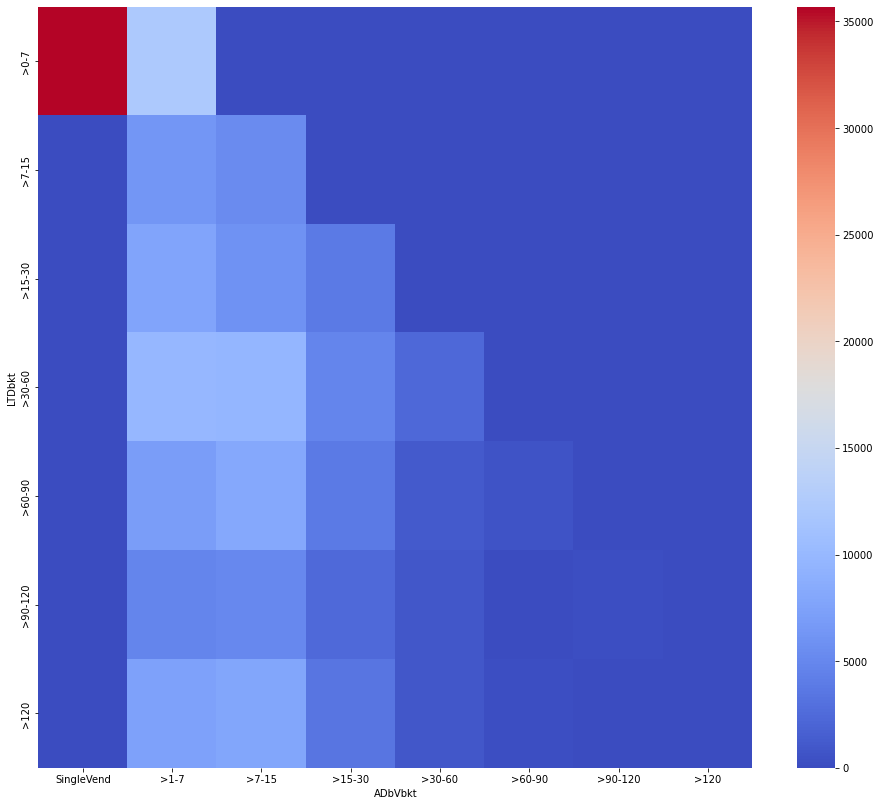

In [ ]:
plt.figure(figsize = (16,14))
# Spectral
sns.heatmap(pd.crosstab(df1.LTDbkt, df1.ADbVbkt), cmap='coolwarm')

In [ ]:
df.Money180.describe()

count   200094.00
mean        33.66
std         54.84
min          0.00
25%          5.00
50%         15.00
75%         40.75
max       5924.72
Name: Money180, dtype: float64

In [ ]:
df1.Money180.describe()

count   157737.00
mean        39.15
std         59.48
min          0.25
25%          7.00
50%         20.00
75%         48.79
max       5924.72
Name: Money180, dtype: float64

In [ ]:
df.columns

Index(['Recency', 'MostRecentTxnDt', 'EarliestTxnDt', 'DaysonBooks', 'Days30',
       'Frequency30', 'Money30', 'Days60', 'Frequency60', 'Money60', 'Days90',
       'Frequency90', 'Money90', 'Days120', 'Frequency120', 'Money120',
       'Days120.1', 'Frequency120.1', 'Money120.1', 'Days180', 'Frequency180',
       'Money180', 'AvgDaysBetweenVends', 'Vend60bkt', 'Money180bkt',
       'Recencybkt', 'LTDbkt', 'ADbVbkt'],
      dtype='object')

In [ ]:
df.loc[:,vars].describe().T

,count,mean,std,min,25%,50%,75%,max
Money180,200094.00,33.66,54.84,0.00,5.00,15.00,40.75,5924.72
DaysonBooks,200094.00,43.99,53.30,0.00,0.00,23.00,70.00,309.00
AvgDaysBetweenVends,200094.00,-268.07,452.03,-999.00,-999.00,6.00,11.00,273.00


In [ ]:
df.loc[df.AvgDaysBetweenVends!=0,vars].describe().T

,count,mean,std,min,25%,50%,75%,max
Money180,200094.00,33.66,54.84,0.00,5.00,15.00,40.75,5924.72
DaysonBooks,200094.00,43.99,53.30,0.00,0.00,23.00,70.00,309.00
AvgDaysBetweenVends,200094.00,-268.07,452.03,-999.00,-999.00,6.00,11.00,273.00


In [ ]:
df1.loc[:,vars].describe().T

,count,mean,std,min,25%,50%,75%,max
Money180,157737.00,39.15,59.48,0.25,7.00,20.00,48.79,5924.72
DaysonBooks,157737.00,50.82,55.83,0.00,1.00,33.00,80.00,309.00
AvgDaysBetweenVends,157737.00,-217.17,422.92,-999.00,1.00,6.00,12.00,273.00


In [ ]:
df1.loc[df1.AvgDaysBetweenVends!=0,vars].describe().T

,count,mean,std,min,25%,50%,75%,max
Money180,157737.00,39.15,59.48,0.25,7.00,20.00,48.79,5924.72
DaysonBooks,157737.00,50.82,55.83,0.00,1.00,33.00,80.00,309.00
AvgDaysBetweenVends,157737.00,-217.17,422.92,-999.00,1.00,6.00,12.00,273.00


In [ ]:
df2.loc[:,vars].describe().T

,count,mean,std,min,25%,50%,75%,max
Money180,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DaysonBooks,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AvgDaysBetweenVends,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Money180 Funnel

In [ ]:
pd.concat([df.Money180.describe(), df.loc[df.Recency <= 60].Money180.describe(),\
           df.loc[df.Recency <= 60].loc[df.AvgDaysBetweenVends>0].Money180.describe(),\
           df.loc[df.Recency <= 60].loc[df.AvgDaysBetweenVends.between(1,30,inclusive='both')].loc[df.DaysonBooks >60].Money180.describe()],\
          axis=1).T

,count,mean,std,min,25%,50%,75%,max
Money180,200094.00,33.66,54.84,0.00,5.00,15.00,40.75,5924.72
Money180,157737.00,39.15,59.48,0.25,7.00,20.00,48.79,5924.72
Money180,122046.00,49.07,64.29,1.00,14.29,29.75,61.00,5924.72
Money180,50111.00,84.19,84.47,1.75,37.50,62.75,105.75,5924.72


## > 90 life time days, recency <=60, Money180/Days on Books [Avg. Monthly Spend] versus  AvgDaysBetweenVends

In [ ]:
df3= df.loc[df.Recency <= 60].loc[df.DaysonBooks >90]

In [ ]:
df3['AvgMonthlySpend']=30*df3.Money180/ df3.DaysonBooks

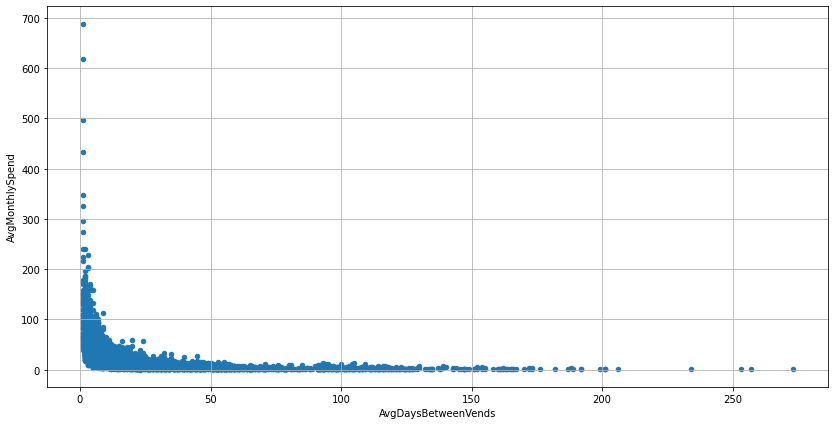

In [ ]:
df3.loc[:,['AvgDaysBetweenVends', 'AvgMonthlySpend']].plot(x='AvgDaysBetweenVends', y= 'AvgMonthlySpend', kind= 'scatter', figsize=(14,7), grid=True)

In [ ]:
df3.ADbVbkt.cat.remove_unused_categories(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


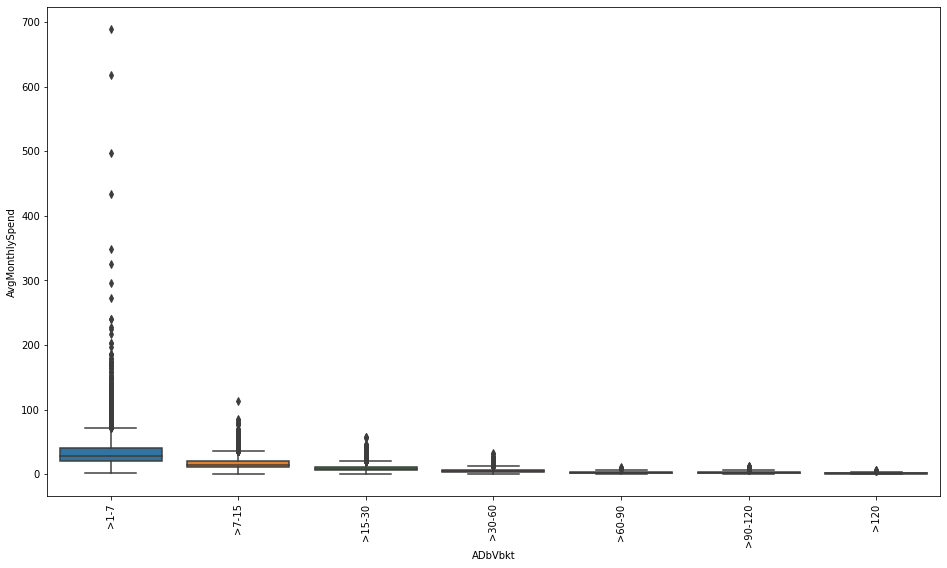

In [ ]:
a4_dims = (16, 9)
fig, ax1 = plt.subplots(figsize=a4_dims)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
# df4= df3.loc[df3.ADbVbkt != 'SingleVend']
sns.boxplot(x=df3['ADbVbkt'], y=df3['AvgMonthlySpend'], ax=ax1)
# df3.loc[:,['ADbVbkt', 'AvgMonthlySpend']]

In [ ]:
df3.AvgMonthlySpend.describe(percentiles=[.01,.99])

count   33338.00
mean       20.84
std        18.28
min         0.22
1%          1.61
50%        16.25
99%        82.63
max       688.92
Name: AvgMonthlySpend, dtype: float64

In [ ]:
df3['AvgMonthlySpendbkt']= pd.qcut(df3.AvgMonthlySpend,5, labels= ['>1.61 to 8.33', '>8.33 to 13.455', '>13.455 to 19.695',
                                           '>19.70 to 30.20', '>30.20'])

In [ ]:
pd.crosstab(df3.AvgMonthlySpendbkt, df3.ADbVbkt)

ADbVbkt,>1-7,>7-15,>15-30,>30-60,>60-90,>90-120,>120
AvgMonthlySpendbkt,,,,,,,
>1.61 to 8.33,73,1605,2949,1497,213,228,103
>8.33 to 13.455,724,3896,1816,216,5,10,0
>13.455 to 19.695,2059,3842,732,51,0,0,0
>19.70 to 30.20,3799,2602,242,8,0,0,0
>30.20,5644,976,46,2,0,0,0


In [ ]:
p1=df3.AvgMonthlySpend.describe(percentiles=[.01,.25,.50,.75,.99]).loc['1%']
p99= df3.AvgMonthlySpend.describe(percentiles=[.01,.25,.50,.75,.99]).loc['99%']

In [ ]:
df3["AvgMonthlySpend"] = np.where(df3["AvgMonthlySpend"] <p1, p1,df3['AvgMonthlySpend'])
df3["AvgMonthlySpend"] = np.where(df3["AvgMonthlySpend"] >p99, p99,df3['AvgMonthlySpend'])

In [ ]:
df3['AvgMonthlySpendbkt']= pd.qcut(df3.AvgMonthlySpend,5, labels= ['>1.61 to 8.33', '>8.33 to 13.455', '>13.455 to 19.695',
                                           '>19.70 to 30.20', '>30.20 to 82.72'])

In [ ]:
pd.crosstab(df3.AvgMonthlySpendbkt, df3.ADbVbkt)

ADbVbkt,>1-7,>7-15,>15-30,>30-60,>60-90,>90-120,>120
AvgMonthlySpendbkt,,,,,,,
>1.61 to 8.33,74,1633,3009,1518,221,228,103
>8.33 to 13.455,739,3962,1833,218,5,10,0
>13.455 to 19.695,2089,3886,748,53,0,0,0
>19.70 to 30.20,3861,2655,252,8,0,0,0
>30.20 to 82.72,5727,1001,47,2,0,0,0


## Earlier

In [ ]:
df.loc[df.Recency <= 60].loc[df.AvgDaysBetweenVends.between(1,15,inclusive='both')].loc[df.DaysonBooks >60].to_csv('DFORE344D2.csv')

In [ ]:
df.Money180.describe()

count   200094.00
mean        33.66
std         54.84
min          0.00
25%          5.00
50%         15.00
75%         40.75
max       5924.72
Name: Money180, dtype: float64

In [ ]:
df.loc[df.Recency <= 60].Money180.describe()

count   157737.00
mean        39.15
std         59.48
min          0.25
25%          7.00
50%         20.00
75%         48.79
max       5924.72
Name: Money180, dtype: float64

In [ ]:
df.loc[df.Recency <= 60].loc[df1.AvgDaysBetweenVends!=0].Money180.describe()

count   157737.00
mean        39.15
std         59.48
min          0.25
25%          7.00
50%         20.00
75%         48.79
max       5924.72
Name: Money180, dtype: float64

In [ ]:
df.loc[df.Recency <= 60].loc[df.AvgDaysBetweenVends.between(1,7,inclusive='both')].loc[df.DaysonBooks >60].Money180.describe()

count   19326.00
mean      131.19
std       112.75
min        12.50
25%        70.00
50%       106.75
75%       160.50
max      5924.72
Name: Money180, dtype: float64

In [ ]:
df.loc[(df.Recency <= 60) & (df.AvgDaysBetweenVends==0) & (df.DaysonBooks>60)].head()

,Recency,MostRecentTxnDt,EarliestTxnDt,DaysonBooks,Days30,Frequency30,Money30,Days60,Frequency60,Money60,Days90,Frequency90,Money90,Days120,Frequency120,Money120,Days120.1,Frequency120.1,Money120.1,Days180,Frequency180,Money180,AvgDaysBetweenVends,Vend60bkt,Money180bkt,Recencybkt,LTDbkt,ADbVbkt
transactor_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
df2.loc[:,vars].describe().T

,count,mean,std,min,25%,50%,75%,max
Money180,11905.00,101.73,68.56,12.50,59.00,85.50,125.40,2501.99
DaysonBooks,11905.00,86.49,17.14,61.00,71.00,85.00,100.00,120.00
AvgDaysBetweenVends,11905.00,5.27,1.46,1.00,4.00,5.00,7.00,7.00


In [ ]:
# sns.displot(s1, color='b')
# sns.displot(s2, color='m')

In [ ]:
df.loc[df.AvgDaysBetweenVends!=0,vars].describe().T

,count,mean,std,min,25%,50%,75%,max
Money180,200094.00,33.66,54.84,0.00,5.00,15.00,40.75,5924.72
DaysonBooks,200094.00,43.99,53.30,0.00,0.00,23.00,70.00,309.00
AvgDaysBetweenVends,200094.00,-268.07,452.03,-999.00,-999.00,6.00,11.00,273.00


## [df1.LTDbkt, df1.ADbVbkt], df1.Money180bkt

- Vends$ 180: 5 buckets Mid term monetary value**
- Length of relastionship- 30,60,90,120: Longevity**
- AvgDaysBetweenVendsL 7,15,30,60: Frequency**

In [ ]:
df1= df.loc[df.Recency <= 60]

- Active in past 60 days

In [ ]:
pd.crosstab([df1.LTDbkt, df1.ADbVbkt], df1.Money180bkt)

Money180bkt           Low  Medium  High  Outlier
LTDbkt  ADbVbkt                                 
>0-7    SingleVend  32453    2929   304        5
        >1-7         7418    3786   962       34
>7-15   >1-7         1370    3025  1746      194
        >7-15        3200    1799   350       14
>15-30  >1-7          300    2759  3631     1061
        >7-15        1334    3019  1422      123
        >15-30       2120    1417   274       14
>30-60  >1-7           16     856  4399     4500
        >7-15         348    3478  4741     1131
        >15-30       1024    2355  1267      105
        >30-60       1289     781   180       10
>60-120 >1-7            0      63  1993     9849
        >7-15          25    1553  6417     5255
        >15-30        280    2401  2881      726
        >30-60        532     968   459       42
        >60-120       478     257    56        4
>120    >1-7            0       1   124     7296
        >7-15           2      55  1751     6058
        >15-30         22     424  1791     1144
        >30-60         91     376   402       66
        >60-120       113     103    32        1
        >120           74      23     6        0

In [ ]:
seg= df1.Money180bkt.isin(['Medium','High','Outlier']) & df1.LTDbkt.isin(['>60-120', '>=120']) & df1.ADbVbkt.isin(['>1-7','>7-15'])

In [ ]:
df2=df1.loc[seg]

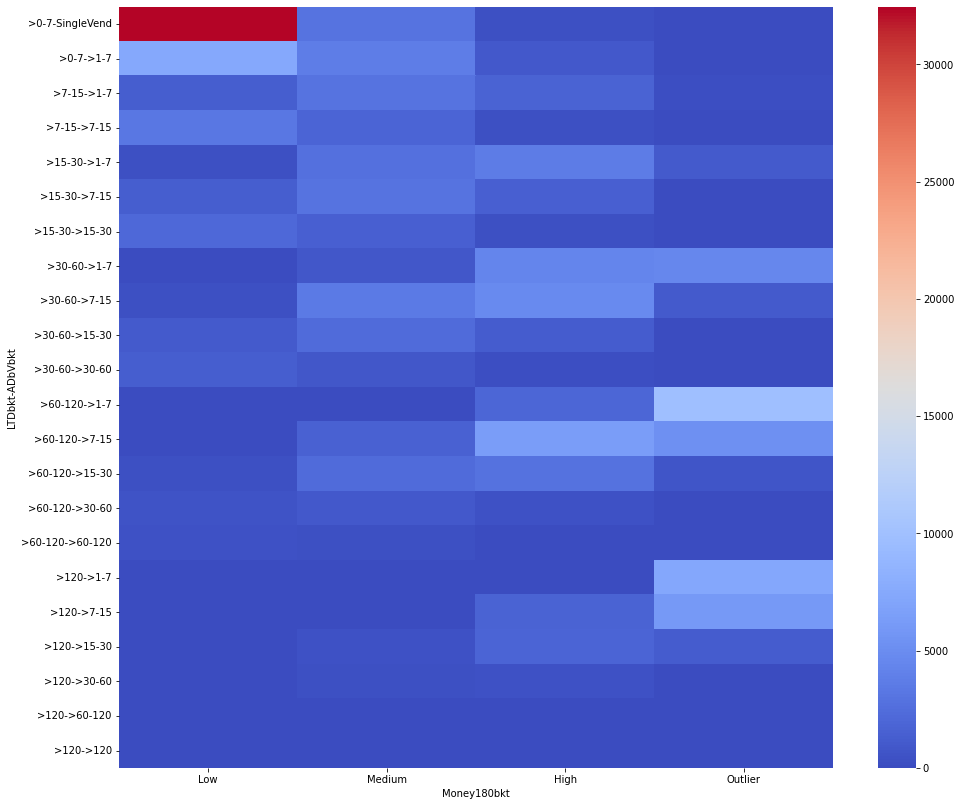

In [ ]:
plt.figure(figsize = (16,14))
# Spectral
sns.heatmap(pd.crosstab([df1.LTDbkt, df1.ADbVbkt], df1.Money180bkt), cmap='coolwarm')

In [ ]:
df.Money180.describe()

count   200094.00
mean        33.66
std         54.84
min          0.00
25%          5.00
50%         15.00
75%         40.75
max       5924.72
Name: Money180, dtype: float64

In [ ]:
df1.Money180.describe()

count   157737.00
mean        39.15
std         59.48
min          0.25
25%          7.00
50%         20.00
75%         48.79
max       5924.72
Name: Money180, dtype: float64

In [ ]:
df.columns

Index(['Recency', 'MostRecentTxnDt', 'EarliestTxnDt', 'DaysonBooks', 'Days30',
       'Frequency30', 'Money30', 'Days60', 'Frequency60', 'Money60', 'Days90',
       'Frequency90', 'Money90', 'Days120', 'Frequency120', 'Money120',
       'Days120.1', 'Frequency120.1', 'Money120.1', 'Days180', 'Frequency180',
       'Money180', 'AvgDaysBetweenVends', 'Vend60bkt', 'Money180bkt',
       'Recencybkt', 'LTDbkt', 'ADbVbkt'],
      dtype='object')

In [ ]:
for v in vars:
  s1= df.loc[:, v]
  s2= df2.loc[:,v]